## Correlation
https://stats.stackexchange.com/questions/171324/what-is-the-relationship-between-orthogonal-correlation-and-independence

##  Random projection 
https://scikit-learn.org/stable/modules/random_projection.html

##  LDA 
https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

## Kurtosis 
https://stats.stackexchange.com/questions/164872/the-independence-in-independent-component-analysis-intuitive-explanation

In [262]:
from intake.catalog import Catalog
from intake.catalog.local import LocalCatalogEntry

from intake.source.csv import CSVSource
import intake
from sklearn.pipeline import make_pipeline
import pandas as pd 
from dask_ml.preprocessing import Categorizer, DummyEncoder ,MinMaxScaler
import dask.dataframe as dd
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn import random_projection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


from matplotlib import pyplot
import random


import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, learning_curve, ShuffleSplit, validation_curve
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from category_encoders.one_hot import OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler

from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV ,cross_validate
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import average_precision_score




In [4]:
from intake.config import conf

# Make data catalogue 

In [ ]:
# %%writefile ml_data.yaml
# sources:
#     liver:
#       args:
#         urlpath: "/home/flufylobster/Documents/georgia_tech/machine_learning/dim_red/indian_liver_patient.csv"  
#       description: "Indian liver patient data set"
#       driver: csv
#     adult:
#       args:
#         urlpath: "/home/flufylobster/Documents/georgia_tech/machine_learning/dim_red/adult.csv"
#       description: "1994 adult census data"
#       driver: csv

In [ ]:
# cat.liver(csv_kwargs={'header': 0, 'skiprows': 1}).read().head()

## Liver data 

In [268]:
liver_df =cat.liver.read()
liver_df.drop_duplicates(inplace=True)
impute_Albumin_and_Globulin_Ratio = liver_df[~liver_df.Albumin_and_Globulin_Ratio.isna()].Albumin_and_Globulin_Ratio.mean()
filt_ =  liver_df.Albumin_and_Globulin_Ratio.isna()
liver_df.loc[filt_, "Albumin_and_Globulin_Ratio" ]= impute_Albumin_and_Globulin_Ratio
assert sum(liver_df.Albumin_and_Globulin_Ratio.isna()) == 0 
# format response 
liver_df.loc[(liver_df.Dataset ==2), "Dataset" ] = 0
liver_df.head(10)
liver_df.loc[:,"Gender"] = pd.get_dummies(liver_df.Gender, prefix='gender').drop("gender_Male", axis =1  ).gender_Female
X = liver_df.loc[:, "Age":"Albumin_and_Globulin_Ratio"]
y = liver_df["Dataset"]



# get validation 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


#pipe 
liver_steps = [MinMaxScaler(),
                    MLPClassifier()]
pipeline = make_pipeline(*liver_steps)
pipeline


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('mlpclassifier', MLPClassifier())])

## Census 

In [71]:
census_df =cat.adult.read()
census_df.drop_duplicates(inplace=True)
# # Deleting duplicates 
census_df.duplicated().sum()
#Replacing '?' for nans
census_df = census_df.replace('?', np.NaN)
# Mapping already our target variable in  1 and 0.

# census_df.income = census_df.income.map({'<=50K':0, '>50K':1})

X_c= census_df.drop('income', axis=1)

y_c = census_df[['income']]




# train_data, test_data = train_test_split(census_df,
#                                          test_size=0.2,
#                                          stratify=census_df['income'],
#                                          random_state=65)
# print('Train data shape is {}'.format(train_data.shape))
# print('Test data shape is {}'.format(test_data.shape))
# X_c_train = train_data.drop('income', axis=1)
# y_c_train = train_data['income']
# X_c_test= test_data.drop('income', axis=1)
# y_c_test= test_data['income']

# #Transforming categorical columns
# categorical_columns= X_c_train.select_dtypes(object).columns



# train_data, test_data = train_test_split(census_df,
#                                          test_size=0.2,
#                                          stratify=census_df['income'],
#                                          random_state=65)
# print('Train data shape is {}'.format(train_data.shape))
# print('Test data shape is {}'.format(test_data.shape))
# X_c_train = train_data.drop('income', axis=1)
# y_c_train = train_data['income']
# X_c_test= test_data.drop('income', axis=1)
# y_c_test= test_data['income']


# PCA 
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

Here we do dimensionality reduction using pca 

In [66]:
pca_census_steps = [('encoding', OneHotEncoder(cols=categorical_columns)),
         ('imputer',SimpleImputer(missing_values=np.NaN, strategy='most_frequent')),
         ('scaler', StandardScaler())]
pca_census_pipeline = Pipeline(pca_census_steps)
pca_census_pipeline.fit(X_c)
pca_census_pipeline

/home/flufylobster/miniconda3/envs/dim_red/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(steps=[('encoding',
                 OneHotEncoder(cols=Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object'))),
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('scaler', StandardScaler())])

###  Initialize pca 

#### Census

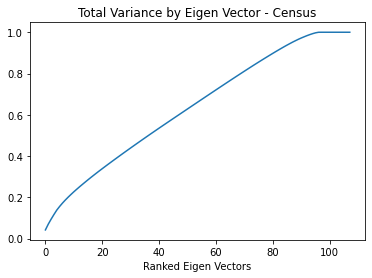

In [406]:
c_data = pca_census_pipeline.transform(X_c)
pca_c = PCA()
pcomps_census = pca_c.fit_transform(c_data)
census_variance = pd.DataFrame(pca_c.explained_variance_ratio_, columns=["Explained_Variance"])
census_variance["cum_variance"] = census_variance.Explained_Variance.cumsum()
ax = census_variance["cum_variance"].plot(title="Total Variance by Eigen Vector - Census")
ax.set_xlabel("Cumulative Variance")
ax.set_xlabel("Ranked Eigen Vectors")
plt.savefig('census_eigen.png')

In [199]:
start_time = time.time()
pca_c = PCA()
pcomps_census = pca_c.fit_transform(pca_c_data)
col_names = [f"principal component {i+1}" for i in range(pcomps_census.shape[1]) ]
principalDf_c = pd.DataFrame(data = pcomps_census
             , columns = col_names)
finalDf_c = pd.concat([principalDf_c, y_c], axis = 1)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.06814765930175781 seconds ---


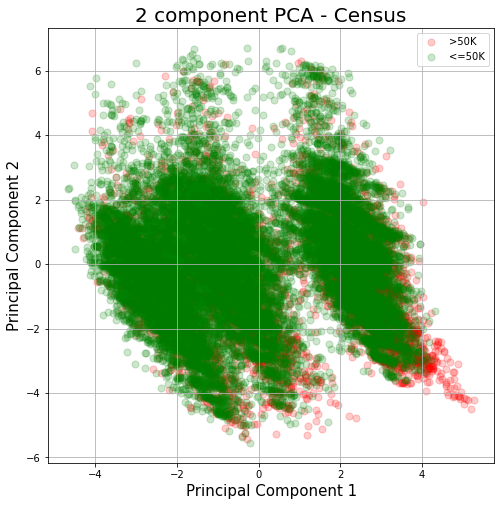

In [408]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA - Census', fontsize = 20)
targets = ['>50K', '<=50K']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_c['income'] == target
    ax.scatter(finalDf_c.loc[indicesToKeep, 'principal component 1']
               , finalDf_c.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50
                ,alpha=0.2)
ax.legend(targets)
ax.grid()
plt.savefig('PCA_census_inital.png')

## Liver Pca

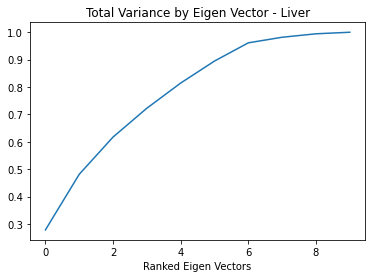

In [407]:
l_data = StandardScaler().fit_transform(X)
pca_l = PCA()
pcomps_liver = pca_l.fit_transform(l_data)
liver_variance = pd.DataFrame(pca_l.explained_variance_ratio_, columns=["Explained_Variance"])
liver_variance["cum_variance"] = liver_variance.Explained_Variance.cumsum()
ax = liver_variance["cum_variance"].plot(title="Total Variance by Eigen Vector - Liver")
ax.set_xlabel("Cumulative Variance")
ax.set_xlabel("Ranked Eigen Vectors")

plt.savefig("liver_eigen.png")

In [195]:

start_time = time.time()
pca_l = PCA()
pcomps_liver = pca_l.fit_transform(pca_l_data)
col_names = [f"principal component {i+1}" for i in range(pcomps_liver.shape[1]) ]
principalDf_l = pd.DataFrame(data = pcomps_liver
             , columns = col_names)
finalDf_l = pd.concat([principalDf_l, y], axis = 1)
finalDf_l.Dataset = finalDf_l.Dataset.map({0:"Not Patient", 1: "Liver Patient"})
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.003280162811279297 seconds ---


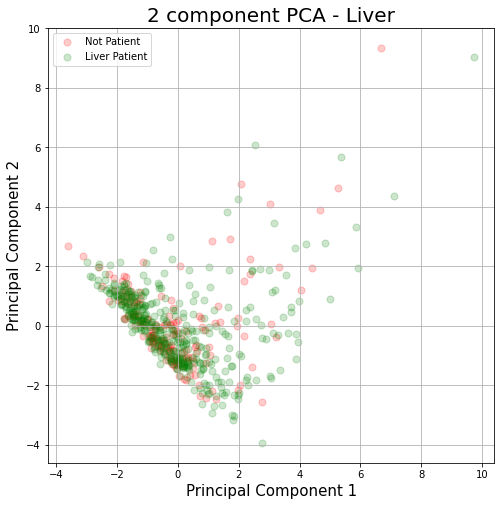

In [410]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA - Liver', fontsize = 20)
targets = ["Not Patient","Liver Patient"]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_l['Dataset'] == target
    ax.scatter(finalDf_l.loc[indicesToKeep, 'principal component 1']
               , finalDf_l.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50
                ,alpha=0.2)
ax.legend(targets)
ax.grid()
plt.savefig('PCA_liver_inital.png')

## ICA 

### census

In [511]:
pca_census_steps_no_scale = [('encoding', OneHotEncoder(cols=categorical_columns)),
         ('imputer',SimpleImputer(missing_values=np.NaN, strategy='most_frequent'))
         ]
pca_census_pipeline_no_scale = Pipeline(pca_census_steps_no_scale)
pca_census_pipeline_no_scale.fit(X_c)
pca_census_pipeline_no_scale

/home/flufylobster/miniconda3/envs/dim_red/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(steps=[('encoding',
                 OneHotEncoder(cols=Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object'))),
                ('imputer', SimpleImputer(strategy='most_frequent'))])

In [514]:
start_time = time.time()
[f"Indpendent Comp {i+1}" for i in range(X_transformed.shape[1]) ]
transformer = FastICA(random_state=0)
X_transformed = transformer.fit_transform(X)
col_names = [f"Indpendent Comp {i+1}" for i in range(X_transformed.shape[1]) ]
X_transformed_df = pd.DataFrame(X_transformed, columns=col_names)
X_transformed_df['Dataset']= y
X_transformed_df
X_transformed_df.Dataset =   X_transformed_df.Dataset.map({0:"Not Patient", 1: "Liver Patient"})
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.019603490829467773 seconds ---


In [515]:

from scipy.stats import norm  

In [516]:
X_transformed_df['Normal'] = np.random.normal(size=X_transformed_df.shape[0])

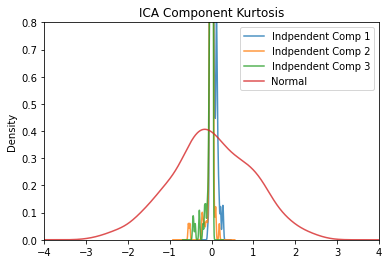

In [518]:
cols =   list(X_transformed_df.columns[:3] )+["Normal"]
ax=X_transformed_df[cols].plot(kind="kde", title= "ICA Component Kurtosis", alpha=.8)
plt.ylim(0.0, .8)
plt.xlim(-4, 4)
plt.savefig("ICA_kurtosis_liver.png")



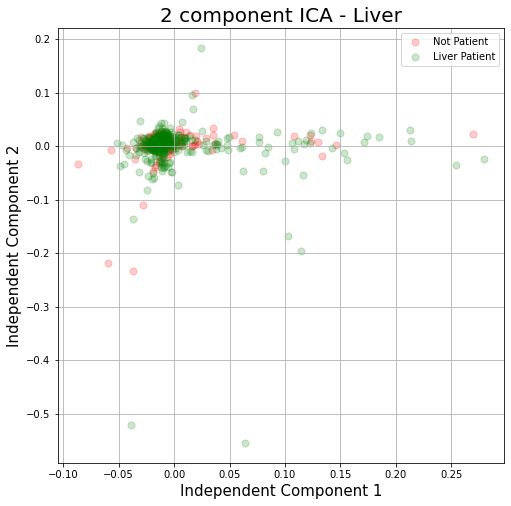

In [519]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Independent Component 1', fontsize = 15)
ax.set_ylabel('Independent Component 2', fontsize = 15)
ax.set_title('2 component ICA - Liver', fontsize = 20)
targets = ["Not Patient","Liver Patient"]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = X_transformed_df['Dataset'] == target
    ax.scatter(X_transformed_df.loc[indicesToKeep, 'Indpendent Comp 1']
               , X_transformed_df.loc[indicesToKeep, 'Indpendent Comp 2']
               , c = color
               , s = 50
                ,alpha=0.2)
ax.legend(targets)
ax.grid()
plt.savefig('ICA_liver_inital.png')

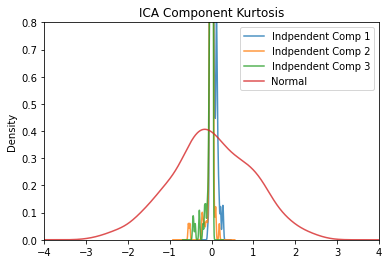

In [520]:
cols =   list(X_transformed_df.columns[:3] )+["Normal"]
ax=X_transformed_df[cols].plot(kind="kde", title= "ICA Component Kurtosis", alpha=.8)
plt.ylim(0.0, .8)
plt.xlim(-4, 4)
plt.savefig("ICA_kurtosis.png")

In [521]:
[(i,X_transformed_df[i].kurtosis()) for i in col_names]

[('Indpendent Comp 1', 13.736476059333699),
 ('Indpendent Comp 2', 99.65727850124206),
 ('Indpendent Comp 3', 65.05165294584161),
 ('Indpendent Comp 4', 0.2601882816829484),
 ('Indpendent Comp 5', -0.6293555197192751),
 ('Indpendent Comp 6', 18.95986223041784),
 ('Indpendent Comp 7', -0.5090057667761836),
 ('Indpendent Comp 8', 284.13557450222805),
 ('Indpendent Comp 9', 434.13764770743256),
 ('Indpendent Comp 10', 1.3867322816049588)]

# census ica 

In [522]:
import time
pca_census_steps_no_scale = [('encoding', OneHotEncoder(cols=categorical_columns)),
         ('imputer',SimpleImputer(missing_values=np.NaN, strategy='most_frequent'))
         ]
pca_census_pipeline_no_scale = Pipeline(pca_census_steps_no_scale)
pca_census_pipeline_no_scale.fit(X_c)
c_data_no_scale = pca_census_pipeline_no_scale.transform(X_c)

/home/flufylobster/miniconda3/envs/dim_red/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [534]:
start_time = time.time()
print("--- %s seconds ---" % (time.time() - start_time))
[f"Indpendent Comp {i+1}" for i in range(X_transformed.shape[1]) ]
transformer_c = FastICA(random_state=0, whiten=True)
X_transformed = transformer_c.fit_transform(c_data_no_scale)
col_names = [f"Indpendent Comp {i+1}" for i in range(X_transformed.shape[1]) ]
X_transformed_df = pd.DataFrame(X_transformed, columns=col_names)
X_transformed_df['income']= y_c.income
X_transformed_df
print("--- %s seconds ---" % (time.time() - start_time))

--- 3.147125244140625e-05 seconds ---
--- 11.99569296836853 seconds ---


/home/flufylobster/miniconda3/envs/dim_red/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


In [535]:
X_transformed_df['Normal'] = np.random.normal(size=X_transformed_df.shape[0])

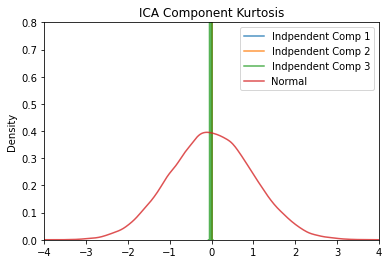

In [536]:
cols =   list(X_transformed_df.columns[:3] )+["Normal"]
ax=X_transformed_df[cols].plot(kind="kde", title= "ICA Component Kurtosis", alpha=.8)
plt.ylim(0.0, .8)
plt.xlim(-4, 4)
plt.savefig("ICA_kurtosis_Census.png")

In [544]:
# [(i,X_transformed_df[i].kurtosis()) for i in col_names]

>50K
<=50K


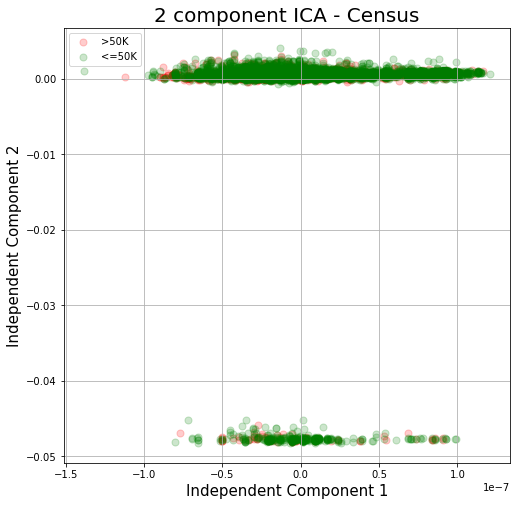

In [543]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Independent Component 1', fontsize = 15)
ax.set_ylabel('Independent Component 2', fontsize = 15)
ax.set_title('2 component ICA - Census', fontsize = 20)
targets = [">50K","<=50K"]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    print(target)
    indicesToKeep = X_transformed_df['income'] == target
    ax.scatter(X_transformed_df.loc[indicesToKeep, 'Indpendent Comp 2']
               , X_transformed_df.loc[indicesToKeep, 'Indpendent Comp 3']
               , c = color
               , s = 50
                ,alpha=0.2)
ax.legend(targets)
ax.grid()

plt.savefig("ICA_Census.png")

# lda 

--- 0.0021767616271972656 seconds ---


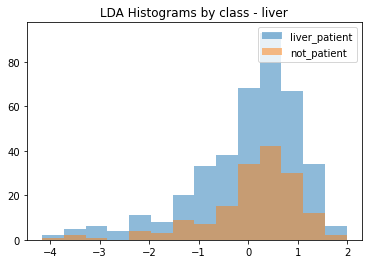

<Figure size 432x288 with 0 Axes>

In [466]:
start_time = time.time()
clf_l= LinearDiscriminantAnalysis()
transform_lda = clf_l.fit_transform(l_data,y)

print("--- %s seconds ---" % (time.time() - start_time))
transform_lda_df = pd.DataFrame(transform_lda,columns=["lda"])
transform_lda_df["Dataset"] = y
liver_patient = transform_lda_df[transform_lda_df.Dataset==1].lda
not_patient = transform_lda_df[transform_lda_df.Dataset==0].lda

bins = np.linspace(transform_lda_df.lda.min(), transform_lda_df.lda.max(), 15)

pyplot.hist(liver_patient, bins, alpha=0.5, label='liver_patient')
pyplot.hist(not_patient, bins, alpha=0.5, label='not_patient')
pyplot.legend(loc='upper right')
pyplot.title("LDA Histograms by class - liver")
pyplot.xlabel("LDA Component 1")
pyplot.show()

plt.savefig("LDA_liver.png")




--- 0.24836206436157227 seconds ---


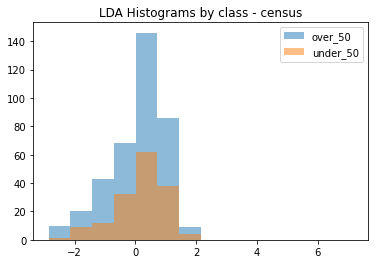

<Figure size 432x288 with 0 Axes>

In [467]:
start_time = time.time()
clf_l= LinearDiscriminantAnalysis()
transform_lda_c = clf_l.fit_transform(c_data,y_c.income.map({'<=50K':0, '>50K':1}))
print("--- %s seconds ---" % (time.time() - start_time))
transform_lda_df_c = pd.DataFrame(transform_lda_c,columns=["lda"])
transform_lda_df_c["income"] = y_c
over_50 = transform_lda_df_c[transform_lda_df_c.income==">50K"].lda
under_50 = transform_lda_df_c[transform_lda_df_c.income=="<=50K"].lda
bins = np.linspace(transform_lda_df_c.lda.min(), transform_lda_df_c.lda.max(), 15)

pyplot.hist(liver_patient, bins, alpha=0.5, label='over_50')
pyplot.hist(not_patient, bins, alpha=0.5, label='under_50')
pyplot.legend(loc='upper right')
pyplot.title("LDA Histograms by class - census")
pyplot.show()


plt.savefig("LDA_census.png")

## RCA 

In [306]:
rp_l.var()

1.6682926402085991

In [503]:
start_time = time.time()
transformer = random_projection.GaussianRandomProjection( n_components=l_data.shape[1])
rp_l = transformer.fit_transform(l_data)
col_nme = [f"Random Comp {i+1}" for i in range(rp_l.shape[1]) ]
rp_l_df = pd.DataFrame(rp_l, columns = col_nme)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0015475749969482422 seconds ---


In [559]:
def iterate_rp(trans_, data, iterations):
    total_variance = []
    for i in range(iterations):
        if i== 0 :
            rp_l = transformer.fit_transform(data)
        else:
            rp_l = transformer.fit_transform(rp_l)
        print(rp_l.var())
        total_variance.append(rp_l.var())
    col_nme = [f"Random Comp {i+1}" for i in range(rp_l.shape[1]) ]
    return pd.DataFrame(rp_l, columns = col_nme), total_variance

        

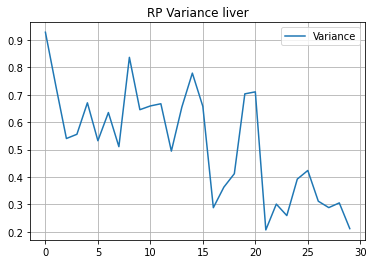

In [506]:
rp=pd.DataFrame(np.array(tot_var).reshape(-1,1), columns=["Variance"])


rp.plot(title= "RP Variance liver")

plt.grid()
plt.savefig("RP_liver_variance.png")

In [504]:
rp_df_l, tot_var = iterate_rp(transformer, l_data,30)

0.9285529528060288
0.7315712126094638
0.5403919138579902
0.5558384481234079
0.6707982890133383
0.5322823356958912
0.635254627207351
0.5106200865054551
0.8368449048977453
0.6456639016320569
0.6593680318781526
0.6673812349118308
0.4943425812172344
0.6552789973091484
0.7792620123612607
0.657666990871428
0.28772074133858816
0.362638199329834
0.4118151665418604
0.7034878562762173
0.7108195986034008
0.20652939821587987
0.3008748456367902
0.25888234470478727
0.3922033760031225
0.4236530264201295
0.31140239914733103
0.28801205560590076
0.30522055759167815
0.21119985057971621


Not Patient
Liver Patient


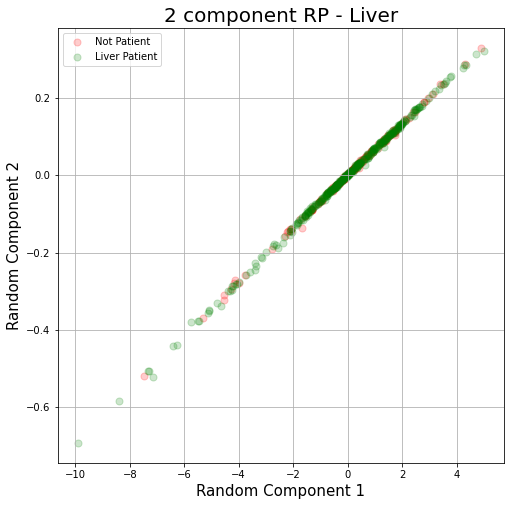

In [492]:
rp_df_l["Dataset"] = y
rp_df_l.Dataset = rp_df_l.Dataset.map({0.0:"Not Patient", 1.0: "Liver Patient"})
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Random Component 1', fontsize = 15)
ax.set_ylabel('Random Component 2', fontsize = 15)
ax.set_title('2 component RP - Liver', fontsize = 20)
targets = ["Not Patient","Liver Patient"]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    print(target)
    indicesToKeep = rp_df_l['Dataset'] == target
    ax.scatter(rp_df_l.loc[indicesToKeep, 'Random Comp 1']
               , rp_df_l.loc[indicesToKeep, 'Random Comp 2']
               , c = color
               , s = 50
                ,alpha=0.2)
ax.legend(targets)
ax.grid()


plt.savefig("RP_liver_30.png")

In [343]:
rp_df_l

,Random Comp 1,Random Comp 2,Dataset
0,0.085208,0.026660,1.0
1,2.014540,0.463358,1.0
2,1.081166,0.254910,1.0
3,-0.552711,-0.137134,1.0
4,0.069032,-0.029547,1.0
...,...,...,...
565,-0.073074,-0.009917,1.0
566,-1.063887,-0.248685,0.0
567,-0.571994,-0.130968,1.0
568,-0.676071,-0.171307,1.0


### census

In [500]:
start_time = time.time()
transformer = random_projection.GaussianRandomProjection( n_components=l_data.shape[1])
rp_l = transformer.fit_transform(c_data)
col_nme = [f"Random Comp {i+1}" for i in range(rp_l.shape[1]) ]
rp_l_df_c = pd.DataFrame(rp_l, columns = col_nme)

start_time= time.time()
rp_df_c, tot_var = iterate_rp(transformer, l_data,40)
print("--- %s seconds ---" % (time.time() - start_time))

0.9785944370462484
0.8556515946021342
0.49442078331519806
0.4398661870387417
0.5627217603244231
0.5258483294386709
0.33456028179634856
0.22170969883196226
0.3215144318898424
0.2076894932248426
0.26064492747394286
0.19399585549409343
0.13857005143557927
0.1552795025137494
0.16492492118256064
0.1582854118305462
0.17987385222887392
0.08825930780479882
0.08757134338870393
0.07028282722834234
0.08899560959943768
0.028142371022238103
0.030405379313731634
0.05964089535987864
0.08842392559154504
0.0753516672811795
0.0849751172617899
0.06709981085762869
0.029714237846298706
0.03985948841547656
0.030583630452515515
0.06051866255812283
0.06448805609818586
0.09945718540203229
0.044345515591767214
0.02721426189517515
0.021229095047432204
0.031969258132927864
0.022326137397629287
0.011577257150979889
--- 0.014467477798461914 seconds ---


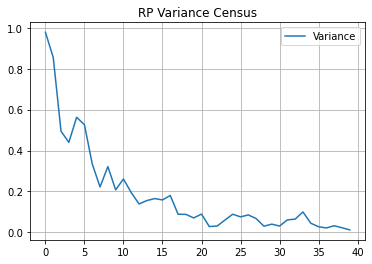

In [501]:

rp=pd.DataFrame(np.array(tot_var).reshape(-1,1), columns=["Variance"])


rp.plot(title= "RP Variance Census")

plt.grid()
plt.savefig("RP_census_variance.png")

0.0017543859649122653
>50K
<=50K


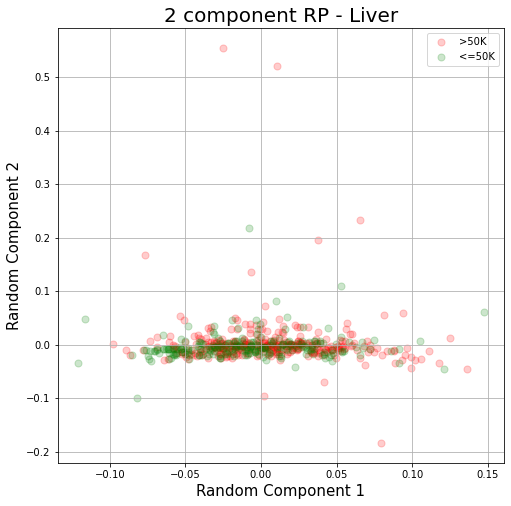

In [560]:
rp_df_c, tot_var = iterate_rp(transformer, l_data,1)
rp_df_c["income"] = y_c
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Random Component 1', fontsize = 15)
ax.set_ylabel('Random Component 2', fontsize = 15)
ax.set_title('2 component RP - Liver', fontsize = 20)
targets = [">50K","<=50K"]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    print(target)
    indicesToKeep = rp_df_c['income'] == target
    ax.scatter(rp_df_c.loc[indicesToKeep, 'Random Comp 1']
               , rp_df_c.loc[indicesToKeep, 'Random Comp 2']
               , c = color
               , s = 50
                ,alpha=0.2)
ax.legend(targets)
ax.grid()

plt.savefig("RP_census_1.png")




/home/flufylobster/miniconda3/envs/dim_red/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


0.00019009387698272677
>50K
<=50K


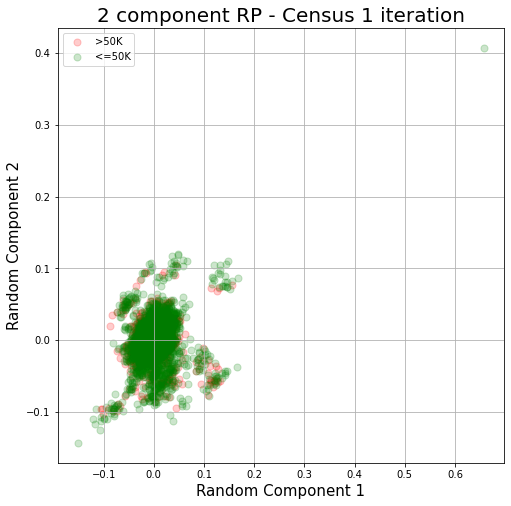

In [562]:
rp_df_c, tot_var = iterate_rp(transformer, c_data,1)
rp_df_c["income"] = y_c
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Random Component 1', fontsize = 15)
ax.set_ylabel('Random Component 2', fontsize = 15)
ax.set_title('2 component RP - Census 1 iteration', fontsize = 20)
targets = [">50K","<=50K"]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    print(target)
    indicesToKeep = rp_df_c['income'] == target
    ax.scatter(rp_df_c.loc[indicesToKeep, 'Random Comp 1']
               , rp_df_c.loc[indicesToKeep, 'Random Comp 2']
               , c = color
               , s = 50
                ,alpha=0.2)
ax.legend(targets)
ax.grid()
plt.savefig("RP_census_1.png")

/home/flufylobster/miniconda3/envs/dim_red/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


0.00019009387698272677
3.073424101791802e-05
3.073424101791808e-05
3.07342410179179e-05
3.073424101791804e-05
3.0734241017918033e-05
3.073424101791795e-05
3.073424101791801e-05
3.0734241017917966e-05
3.073424101791792e-05
>50K
<=50K


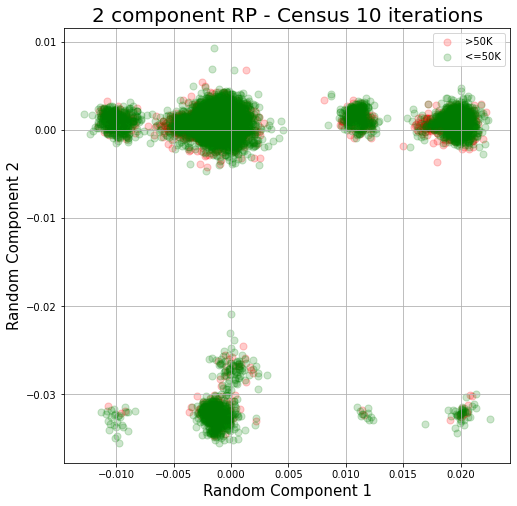

In [563]:
rp_df_c, tot_var = iterate_rp(transformer, c_data,10)
rp_df_c["income"] = y_c
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Random Component 1', fontsize = 15)
ax.set_ylabel('Random Component 2', fontsize = 15)
ax.set_title('2 component RP - Census 10 iterations', fontsize = 20)
targets = [">50K","<=50K"]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    print(target)
    indicesToKeep = rp_df_c['income'] == target
    ax.scatter(rp_df_c.loc[indicesToKeep, 'Random Comp 1']
               , rp_df_c.loc[indicesToKeep, 'Random Comp 2']
               , c = color
               , s = 50
                ,alpha=0.2)
ax.legend(targets)
ax.grid()
plt.savefig("RP_census_10.png")

In [571]:
rp_df_c.cov()

,Random Comp 1,Random Comp 2,Random Comp 3,Random Comp 4,Random Comp 5,Random Comp 6,Random Comp 7,Random Comp 8,Random Comp 9,Random Comp 10,...,Random Comp 99,Random Comp 100,Random Comp 101,Random Comp 102,Random Comp 103,Random Comp 104,Random Comp 105,Random Comp 106,Random Comp 107,Random Comp 108
Random Comp 1,3.073519e-05,-9.680377e-21,-2.204660e-20,-3.934465e-20,-5.402017e-20,-5.001139e-20,7.055762e-20,-6.377677e-20,-2.955768e-19,-2.829802e-20,...,-8.528395e-20,9.328817e-21,2.095360e-20,-1.312932e-20,-4.594930e-20,-1.328136e-20,3.190640e-20,1.342257e-20,-1.679070e-20,1.150982e-20
Random Comp 2,-9.680377e-21,3.073519e-05,-4.929828e-20,-1.505540e-19,-2.094360e-19,-9.288496e-20,2.593874e-20,2.478593e-19,1.302935e-21,-8.777652e-20,...,2.768238e-20,-1.537031e-20,-5.347700e-20,8.188332e-20,7.934243e-20,2.523229e-20,-1.456305e-19,-4.799867e-20,-3.563578e-20,1.914748e-20
Random Comp 3,-2.204660e-20,-4.929828e-20,3.073519e-05,-7.028520e-20,3.056400e-20,-6.869902e-20,4.340008e-20,7.950238e-20,6.346062e-20,7.917582e-21,...,4.196052e-20,-2.048833e-20,-6.282081e-20,4.718559e-21,4.190720e-19,-1.708811e-20,-9.725696e-20,-2.135348e-19,-3.942129e-20,-2.040710e-20
Random Comp 4,-3.934465e-20,-1.505540e-19,-7.028520e-20,3.073519e-05,6.059649e-19,-1.084469e-19,8.132849e-20,-4.820378e-19,-1.199367e-19,-1.047659e-19,...,5.480159e-20,-3.688540e-20,-2.811141e-20,-1.496710e-19,5.295049e-20,1.149649e-19,-8.930606e-20,-1.271945e-20,-4.653445e-19,9.860738e-21
Random Comp 5,-5.402017e-20,-2.094360e-19,3.056400e-20,6.059649e-19,3.073519e-05,-1.526184e-19,4.209693e-20,2.148177e-19,2.686513e-20,1.496260e-19,...,2.301297e-20,1.789828e-20,-5.239733e-20,-2.561884e-20,-4.680237e-20,1.007692e-20,2.209458e-19,-7.342757e-20,-2.232318e-20,-1.146147e-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Random Comp 104,-1.328136e-20,2.523229e-20,-1.708811e-20,1.149649e-19,1.007692e-20,1.439560e-21,7.837606e-21,3.159868e-20,-2.240649e-20,5.484991e-21,...,2.343368e-20,1.638666e-20,-7.057844e-21,1.606843e-20,-6.547334e-20,3.073519e-05,-3.916804e-20,-7.284442e-21,1.990392e-20,2.416012e-20
Random Comp 105,3.190640e-20,-1.456305e-19,-9.725696e-20,-8.930606e-20,2.209458e-19,-9.415791e-20,2.669851e-20,-3.132377e-20,-2.752992e-20,-4.657452e-20,...,-2.531227e-20,-2.519897e-20,1.945906e-20,-2.529227e-20,-5.059788e-20,-3.916804e-20,3.073519e-05,-5.431674e-20,1.561523e-20,1.940741e-20
Random Comp 106,1.342257e-20,-4.799867e-20,-2.135348e-19,-1.271945e-20,-7.342757e-20,-5.712255e-20,-1.823276e-20,7.172476e-20,-3.139874e-21,1.967420e-20,...,-4.008776e-20,-1.958818e-20,3.915471e-19,-4.837189e-20,-4.539947e-19,-7.284442e-21,-5.431674e-20,3.073519e-05,1.617839e-20,1.816778e-20
Random Comp 107,-1.679070e-20,-3.563578e-20,-3.942129e-20,-4.653445e-19,-2.232318e-20,1.733137e-20,-5.869707e-20,-1.521135e-19,-7.676822e-22,-2.170504e-20,...,-3.047736e-20,1.000444e-20,-3.858821e-21,-3.071229e-20,-1.866097e-21,1.990392e-20,1.561523e-20,1.617839e-20,3.073519e-05,-4.016773e-20


/home/flufylobster/miniconda3/envs/dim_red/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


0.00019009387698272677
3.073424101791802e-05
3.073424101791808e-05
3.07342410179179e-05
3.073424101791804e-05
3.0734241017918033e-05
3.073424101791795e-05
3.073424101791801e-05
3.0734241017917966e-05
3.073424101791792e-05
3.0734241017918054e-05
3.073424101791788e-05
3.073424101791796e-05
3.0734241017917884e-05
3.073424101791788e-05
3.073424101791783e-05
3.0734241017917884e-05
3.073424101791803e-05
3.073424101791807e-05
3.073424101791796e-05
3.073424101791783e-05
3.073424101791781e-05
3.073424101791807e-05
3.07342410179179e-05
3.073424101791791e-05
3.073424101791795e-05
3.0734241017918e-05
3.0734241017917966e-05
3.0734241017918054e-05
3.073424101791801e-05
3.0734241017917986e-05
3.073424101791808e-05
3.073424101791799e-05
3.073424101791798e-05
3.0734241017918e-05
3.073424101791796e-05
3.073424101791791e-05
3.073424101791791e-05
3.073424101791794e-05
3.073424101791796e-05
>50K
<=50K


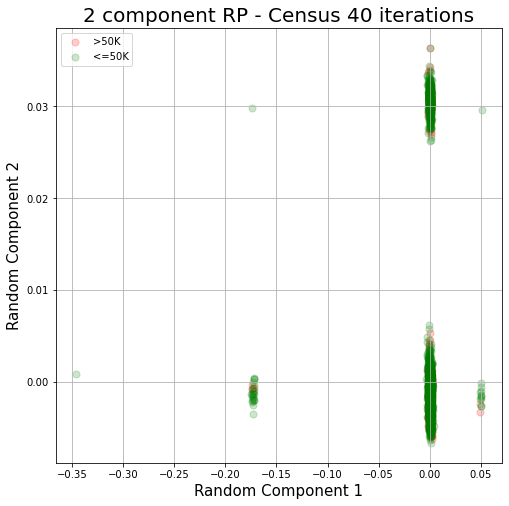

In [565]:
rp_df_c, tot_var = iterate_rp(transformer, c_data,100)
rp_df_c["income"] = y_c
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Random Component 1', fontsize = 15)
ax.set_ylabel('Random Component 2', fontsize = 15)
ax.set_title('2 component RP - Census 40 iterations', fontsize = 20)
targets = [">50K","<=50K"]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    print(target)
    indicesToKeep = rp_df_c['income'] == target
    ax.scatter(rp_df_c.loc[indicesToKeep, 'Random Comp 1']
               , rp_df_c.loc[indicesToKeep, 'Random Comp 2']
               , c = color
               , s = 50
                ,alpha=0.2)
ax.legend(targets)
ax.grid()
plt.savefig("RP_census_40.png")

/home/flufylobster/miniconda3/envs/dim_red/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


0.00019009387698272677
3.073424101791802e-05
3.073424101791808e-05
3.07342410179179e-05
3.073424101791804e-05
3.0734241017918033e-05
3.073424101791795e-05
3.073424101791801e-05
3.0734241017917966e-05
3.073424101791792e-05
3.0734241017918054e-05
3.073424101791788e-05
3.073424101791796e-05
3.0734241017917884e-05
3.073424101791788e-05
3.073424101791783e-05
3.0734241017917884e-05
3.073424101791803e-05
3.073424101791807e-05
3.073424101791796e-05
3.073424101791783e-05
3.073424101791781e-05
3.073424101791807e-05
3.07342410179179e-05
3.073424101791791e-05
3.073424101791795e-05
3.0734241017918e-05
3.0734241017917966e-05
3.0734241017918054e-05
3.073424101791801e-05
3.0734241017917986e-05
3.073424101791808e-05
3.073424101791799e-05
3.073424101791798e-05
3.0734241017918e-05
3.073424101791796e-05
3.073424101791791e-05
3.073424101791791e-05
3.073424101791794e-05
3.073424101791796e-05
3.073424101791788e-05
3.073424101791781e-05
3.073424101791802e-05
3.0734241017917925e-05
3.073424101791815e-05
3.0734

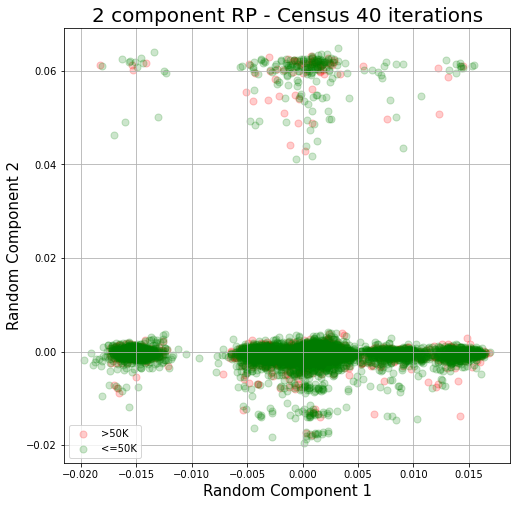

In [572]:
rp_df_c, tot_var = iterate_rp(transformer, c_data,100)
rp_df_c["income"] = y_c
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Random Component 1', fontsize = 15)
ax.set_ylabel('Random Component 2', fontsize = 15)
ax.set_title('2 component RP - Census 40 iterations', fontsize = 20)
targets = [">50K","<=50K"]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    print(target)
    indicesToKeep = rp_df_c['income'] == target
    ax.scatter(rp_df_c.loc[indicesToKeep, 'Random Comp 1']
               , rp_df_c.loc[indicesToKeep, 'Random Comp 2']
               , c = color
               , s = 50
                ,alpha=0.2)
ax.legend(targets)
ax.grid()
plt.savefig("RP_census_100.png")

0.0017543859649122653
0.0017543859649122992
0.0017543859649122595
0.0017543859649122757
0.0017543859649123636
0.0017543859649122764
0.001754385964912261
0.0017543859649122202
0.0017543859649122716
0.0017543859649122894
0.0017543859649123558
0.0017543859649122315
0.0017543859649122183
0.0017543859649122888
0.001754385964912256
0.001754385964912285
0.0017543859649122233
0.0017543859649123948
0.001754385964912272
0.0017543859649122857
0.001754385964912323
0.001754385964912353
0.001754385964912273
0.0017543859649122725
0.0017543859649122432
0.001754385964912148
0.001754385964912146
0.00175438596491228
0.0017543859649123573
0.0017543859649122914
0.0017543859649122775
0.001754385964912275
0.001754385964912198
0.0017543859649122716
0.0017543859649122393
0.0017543859649122458
0.0017543859649123634
0.0017543859649124147
0.0017543859649122415
0.0017543859649122892
>50K
<=50K


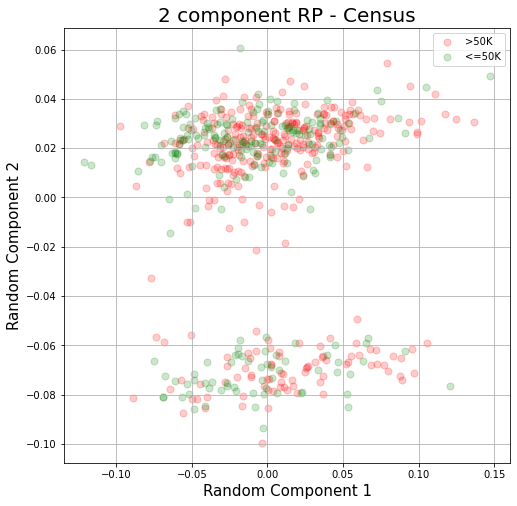

In [558]:
rp_df_c, tot_var = iterate_rp(transformer, c_data,40)
rp_df_c["income"] = y_c
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Random Component 1', fontsize = 15)
ax.set_ylabel('Random Component 2', fontsize = 15)
ax.set_title('2 component RP - Census', fontsize = 20)
targets = [">50K","<=50K"]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    print(target)
    indicesToKeep = rp_df_c['income'] == target
    ax.scatter(rp_df_c.loc[indicesToKeep, 'Random Comp 1']
               , rp_df_c.loc[indicesToKeep, 'Random Comp 2']
               , c = color
               , s = 50
                ,alpha=0.2)
ax.legend(targets)
ax.grid()
plt.savefig("RP_census_40.png")